# 1.1


In [153]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import pandas as pd
import numpy as np
import math
import random 
from numpy.linalg import *
from tqdm import tqdm

In [154]:
N=8000
p=0.25
result=[]
mu1 = 3
sigma1 = 2
mu2 = -1
sigma2 = 0.8
data=np.random.binomial(1,p,size=N)
data
for i in range(len(data)):
    if data[i]==1:
        temp=np.random.normal(mu1, sigma1)        
        result.append(temp)
    else:
        temp=np.random.normal(mu2,sigma2)        
        result.append(temp)
        
        

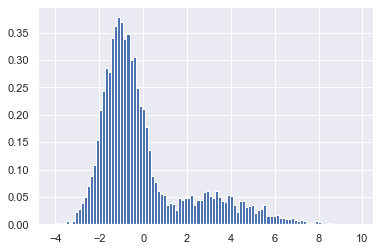

In [155]:
plt.hist(result,bins=100, density=1)
plt.show()

# 1.2

In [174]:
LL=[]
def gaussian(x,mu,sigma):
    temp = -np.square(x-mu)/(2*sigma)
    return np.exp(temp)/(np.sqrt(2.0*np.pi*sigma))

def e_step(data, alpha, mus, sigmas):
    Qs = []
    for i in range(len(data)):
        q = [alpha*gaussian(data[i],mu,sigma) for alpha,mu,sigma in zip(alpha,mus,sigmas)]
        Qs.append(q)
    Qs = np.array(Qs)
    Qs = Qs / np.sum(Qs,axis=1).reshape(-1,1)
    return Qs
def m_step(data, alpha, mus, sigmas, Qs):
    data = np.array(data)
    gama_j = np.sum(Qs,axis=0)  #counting the sum of p(l|xi,theta old)
    new_alpha = gama_j/len(data)  # counting the new alpha
    mu_temp = np.sum(Qs*(data.reshape(-1,1)),axis=0)
    new_mus =mu_temp/gama_j    #counting the new mu
    X_i_mu_j = np.square(np.array([data]).reshape(-1,1)-np.array([mus]))
    new_sigmas = np.sum(Qs*X_i_mu_j,axis=0)/gama_j  #counting the new sigma
    return new_alpha,new_mus,new_sigmas
def EM(data):
    # intialize the start value
    alpha = [0.5,0.5] #  latent value
    mus = [10,2]       #  gaussian mu
    sigmas = [1,3]    #  gaussian sigma
    # iteration start
    for i in range(40):
        
        ll = 1
        for j in range(N):
            tmp = 0
            for m in range(2):
                tmp += alpha[m]*gaussian(data[j],mus[m],sigmas[m])
            ll += math.log(tmp)
        LL.append(ll)
    
        Qs = e_step(data,alpha,mus,sigmas)
        alpha, mus, sigmas= m_step(data,alpha,mus,sigmas,Qs)
        print ('Iteration',i)
        print (' alpha is ',alpha)
        print ('mus is',mus)
        print ('sigama is', sigmas )
        print ('Log',ll)
        print ('\n')
        
        


In [157]:
EM(result)

Iteration 0
 alpha is  [0.00706768 0.99293232]
mus is [ 7.53290741 -0.03931159]
sigama is [6.61931906 8.36318935]
Log -28472.41828863211


Iteration 1
 alpha is  [0.00417631 0.99582369]
mus is [ 6.24527204 -0.01192559]
sigama is [4.76045893 4.42427053]
Log -18058.661296968206


Iteration 2
 alpha is  [0.01204463 0.98795537]
mus is [ 6.46971657 -0.06449579]
sigama is [1.95874859 4.10192156]
Log -17336.05038216835


Iteration 3
 alpha is  [0.02643522 0.97356478]
mus is [ 6.17429344 -0.15305851]
sigama is [1.35530563 3.62028548]
Log -17171.92750322387


Iteration 4
 alpha is  [0.0443314 0.9556686]
mus is [ 5.79639461 -0.25401678]
sigama is [1.33463533 3.12537416]
Log -16960.38629927183


Iteration 5
 alpha is  [0.06500938 0.93499062]
mus is [ 5.40960019 -0.36093231]
sigama is [1.44466501 2.65597268]
Log -16726.66201601459


Iteration 6
 alpha is  [0.08854768 0.91145232]
mus is [ 5.0371131  -0.47376947]
sigama is [1.59612599 2.20783192]
Log -16462.033268526462


Iteration 7
 alpha is  [0.1

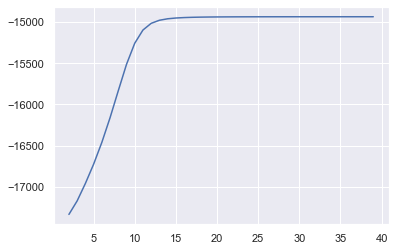

In [158]:
plt.plot([x for x in range(2,40)], LL[2:])

# 1.3

In [53]:
def kernel(x):
    if(abs(x)<1/2):
        return 1
    else:
        return 0
def KDE(x,h):
    temp=0
    for i in range(N):
        temp+=((kernel((x-result[i])/h))/(N*h))
    return temp

answer = []
h = 2     #set band =2
for x1 in np.arange(-4,10,0.1):
    answer.append(KDE(x1,h))

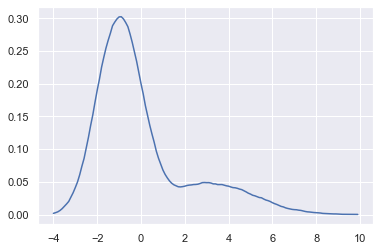

In [55]:
plt.plot(np.arange(-4,10,0.1), answer)

# 2.1

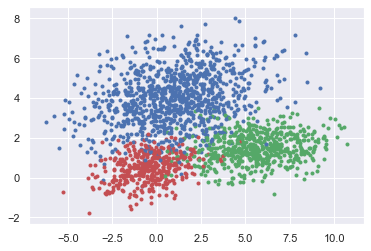

In [221]:
N=2000
p=0.25
X=[]
Y=[]
data=[]
mean = np.array([[-0.5,0.5],[5.5,1.5],[1,4]])
cov = np.array([[[2.0,0.3],[0.3,0.5]],[[4.0,0.3],[0.3,0.5]],[[6.0,1.0],[1.0,2.0]]])
alpha = [0.2,0.3,0.5]
for i in range(N):
    temp = random.randint(1,10) 
    data.append(temp)
for i in range(N):
    if data[i]<=2:
        m= 0
        color='r'
    elif(data[i] >2 and data[i]<=5): 
        m = 1
        color='g'
    else: 
        m = 2
        color='b'
        result.append(temp)
    x,y = np.random.multivariate_normal(mean[m],cov[m]).T
    plt.scatter(x,y,c=color,marker='.')
    X.append(x)
    Y.append(y)

# 2.2

In [224]:
( this question I look at Hanwei code,mine is at the bottom 
 while still have bugs I will still work on that after the deadline )

SyntaxError: invalid syntax (<ipython-input-224-5a5e4cf0ebeb>, line 1)

In [ ]:
N=2000
M=3
#initialize
mean = np.array([[0,0],[1,2],[1,3]])
cov = np.array([[[1,0],[0,1]],[[2,0],[0,1]],[[1,0],[0,2]]])
alpha = [0.2,0.2,0.6]
def multi_guassian(x, mean, cov):
    return np.exp(-0.5*((x-mean).T).dot(inv(cov)).dot(x-mean))/((2*math.pi*(det(cov)**(0.5))))
def prob_m(i,m):
    return alpha[m]*p[i][m]/np.sum([alpha[j]*p[i][j] for j in range(M)])
X = np.array(X)
Y = np.array(Y)

In [223]:

LL = []
for iter in range(201):
    
    #calculate p(xj|theta)
    p = np.zeros((N,M))
    for n in range(N):
        for m in range(M):
            p[n][m] = multi_guassian(np.array([X[n],Y[n]]), mean[m], cov[m])

   

    #calculate new mean and cov and alpha
    for m in range(M):
        alpha[m] = np.sum([prob_m(i,m) for i in range(N)]) / N  #caculate alpha
        mean[m] = np.sum([np.dot([X[i],Y[i]], prob_m(i,m)) for i in range(N)], axis=0) / (N*alpha[m]) #caculate mean
        mat = np.zeros((2,2))
        for i in range(N):
            mat += np.array(prob_m(i,m)).dot((np.array([np.array([X[i],Y[i]])-mean[m]]).T)).dot(np.array([np.array([X[i],Y[i]])-mean[m]]))
        cov[m] = mat / (N*alpha[m])  #new cov
        
    
    #calculate Log Likelyhood
    ll = 1
    for i in range(N):
        tmp = 0
        for m in range(M):
            tmp += alpha[m]*p[i][m]
        ll += math.log(tmp)
    LL.append(ll)
    
    print ('Iteration',iter)
    print (' alpha is ',alpha)
    print ('mean is',mean)
    print ('cov is', cov )
    print ('Log',ll)
    print ('\n')
        



Iteration 0
 alpha is  [0.2056045896943714, 0.2954980284788576, 0.49826813638798273]
mean is [[-0.46605495  0.49686343]
 [ 5.53380399  1.49329703]
 [ 1.01238517  3.97836342]]
cov is [[[1.89856258 0.31074016]
  [0.31074016 0.52549932]]

 [[3.94281373 0.27289027]
  [0.27289027 0.52480537]]

 [[5.98691702 0.93155474]
  [0.93155474 1.88409523]]]
Log -8735.375148683515


Iteration 1
 alpha is  [0.20866152202880608, 0.29449373216118013, 0.4964431987937847]
mean is [[-0.45574726  0.50414389]
 [ 5.55224137  1.49676146]
 [ 1.01490169  3.98783418]]
cov is [[[1.88134788 0.31927799]
  [0.31927799 0.53233274]]

 [[3.89598472 0.26777995]
  [0.26777995 0.52953848]]

 [[6.00291646 0.92374416]
  [0.92374416 1.86072168]]]
Log -8731.829257759206


Iteration 2
 alpha is  [0.21061869228858077, 0.29415574199114314, 0.49495701155672855]
mean is [[-0.44737824  0.51042175]
 [ 5.56092462  1.49856935]
 [ 1.0148209   3.99509103]]
cov is [[[1.88483283 0.3252987 ]
  [0.3252987  0.53693994]]

 [[3.86341143 0.2646565

KeyboardInterrupt: 

In [ ]:
plt.plot([x for x in range(1,25)],LL[1:25])

In [207]:
def multi_guassin(x,mean,cov):
    return np.exp(-0.5*((x-mean).T).dot(inv(cov)).dot(x-mean))/((2*math.pi*(det(cov)**(0.5))))

def update_W(data, alpha, mean, cov):
    n_points, n_clusters = len(data), len(alpha)
    pdfs = np.zeros(((n_points, n_clusters)))
    for i in range(n_clusters):
        pdfs[:, i] = Pi[i] * multivariate_normal.pdf(X, Mu[i], cov[i])
    W = pdfs / pdfs.sum(axis=1).reshape(-1, 1)
    return W
def update_Pi(W):
    Pi = W.sum(axis=0) / W.sum()
    return Pi

def update_Mu(X, W):
    n_clusters = W.shape[1]
    Mu = np.zeros((n_clusters, 2))
    for i in range(n_clusters):
        Mu[i] = np.average(X, axis=0, weights=W[:, i])
    return Mu

def logLH(X, Pi, Mu, Var):
    n_points, n_clusters = len(X), len(Pi)
    pdfs = np.zeros(((n_points, n_clusters)))
    for i in range(n_clusters):
        pdfs[:, i] = Pi[i] * multivariate_normal.pdf(X, Mu[i], cov[i])
    return np.mean(np.log(pdfs.sum(axis=1)))
def update_cov(X, Mu, W):
    n_clusters = W.shape[1]
    Var = np.zeros((n_clusters, 2))
    for i in range(n_clusters):
        Var[i] = np.average((X - Mu[i]) ** 2, axis=0, weights=W[:, i])
    return np.diag(Var)

loglh = []
for i in range(20):
    loglh.append(logLH(X, alpha, mean, cov))
    W = update_W(X, alpha, mean, cov)
    Pi = update_Pi(W)
    Mu = update_Mu(X, W)
    print('log-likehood:%.3f'%loglh[-1])
    Var = update_Var(X, Mu, W)



NameError: name 'multivariate_normal' is not defined